# 4.2. Design

## 4.2.2. Configuring $i_\text{max}$

Let:
- the maximum capacity of a link be $20$ Gbps
- the traffic per malicious route be $4$ Gbps.
- $1 \leq i_\text{max} \leq 20$
- $5 \leq K \leq 60$

Recall that a malicious route is considered **successful** if it travels through the target link.
The attacker therefore needs $5$ successes for a successful LFA.

In [1]:
# Libraries
import numpy as np
from scipy.stats import nbinom
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from matplotlib.ticker import MaxNLocator
from scipy.stats import binom
from matplotlib.ticker import MaxNLocator  ## TODO: CAN I TRANSFORM THIS TO SEABORN? NOT VERY IMPORTANT
import seaborn as sns

# Global params
matplotlib.rcParams["font.sans-serif"] = "Times New Roman"
matplotlib.rcParams["font.size"] = 13

### Probability of Congestion per Snapshot
We compute the probability of a successful LFA $P[A \leq K]$ after at most $K$ trials against $i_\text{max}$.

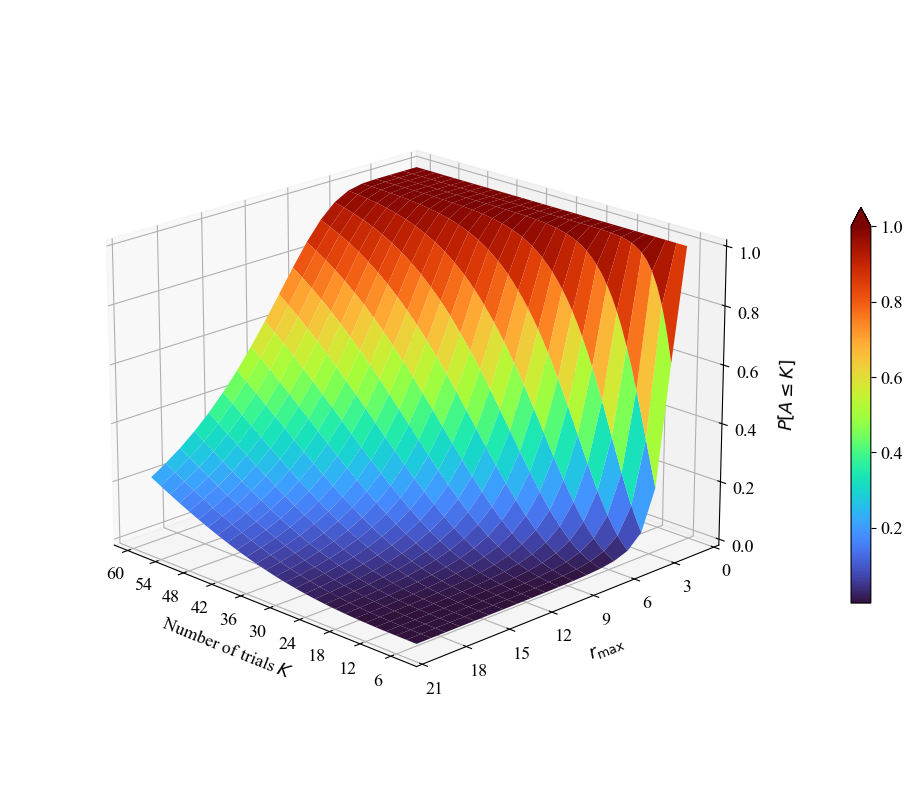

In [5]:
# Parameters
r_max_arr = np.arange(1, 21)            # maximum index of the randomly selected multipath.
n = 5                                   # number of successful trials needed to congest the link.
trials_arr = np.arange(n, 60)           # number of trials


# CDF matrix using the negative binomial distribution
cdf_matrix = np.zeros(shape=(len(r_max_arr), len(trials_arr)))
for idx, r_max in enumerate(r_max_arr):
    p = 1/r_max                         # probability of a successful trial
    cdf_matrix[idx, :] = nbinom.cdf(trials_arr, n, p)

# 3D Plot
fig = plt.figure(figsize=(11, 8), constrained_layout=True)
ax = fig.add_subplot(111, projection="3d")
ax.view_init(elev=20, azim=135)
ax.set_box_aspect(aspect=None, zoom=.85)
x_axis, y_axis = np.meshgrid(trials_arr, r_max_arr)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel(r"Number of trials $K$", labelpad=10)
ax.set_ylabel(r"$r_\text{max}$", labelpad=10)
ax.set_zlabel(r"$P[A \leq K]$", labelpad=10) 
surf = ax.plot_surface(x_axis, y_axis, cdf_matrix, cmap = cm.turbo)
bar = fig.colorbar(surf, ax=ax, shrink=0.5, extend='max')
plt.savefig("../images/4_2_defence_cdf.svg", format='svg')
plt.show()

### Expected Malicious Traffic per Snapshot.
We compute the expected malicious traffic per snapshot against $K$ trials and $i_\text{max}$.

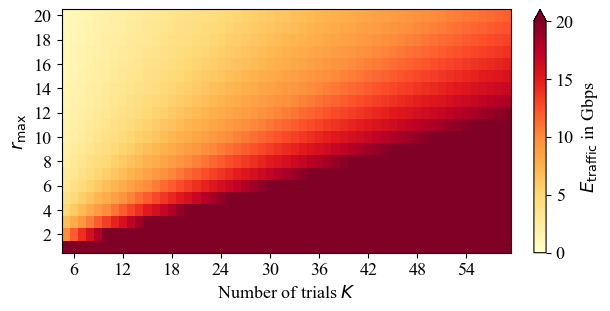

In [3]:

# INITIAL VALUES
r_max_arr = np.arange(1, 21)        # Number of different possible values of r_max.
trials_arr = np.arange(5, 60)       # Number of maliciously executed routes per snapshot. Equivalent to the number of independent trials.

# MEAN given (rmax, K)
mean_matrix = np.zeros(shape=(len(r_max_arr), len(trials_arr)))
for i, r_max in enumerate(r_max_arr):
    p = 1/r_max
    for j, trials in enumerate(trials_arr):
        mean_matrix[i, j] = binom.mean(trials, p)*4  # scale to 4 GBits/snapshot per success (4 GBits/snapshot)

# 2D matrix plot.
fig, ax = plt.subplots(figsize=(6, 3), constrained_layout=True)
x_axis, y_axis = np.meshgrid(trials_arr, r_max_arr)
cbar = ax.pcolormesh(x_axis, y_axis, mean_matrix, cmap=cm.YlOrRd, vmin=0, vmax=20)
bar = fig.colorbar(cbar, ax=ax, extend='max', label=r"$E_\text{traffic}$ in Gbps")
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel(r"Number of trials $K$")
plt.ylabel(r"$r_\text{max}$")
plt.savefig("../images/4_2_defence_mean.svg")
plt.show()

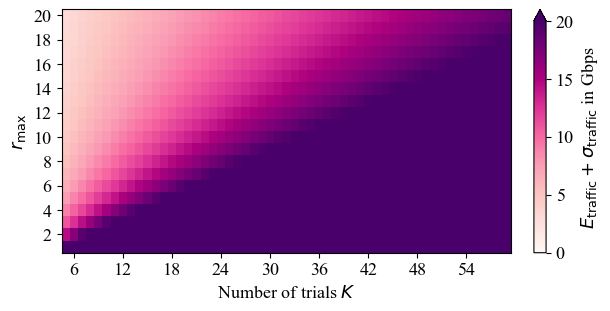

In [4]:
# MEAN + STANDARD DEVIATION given (rmax, K)
# Compute standard deviation
std_matrix = np.zeros(shape=(len(r_max_arr), len(trials_arr)))
for i, r_max in enumerate(r_max_arr):
    p = 1/r_max
    for j, trials in enumerate(trials_arr):
        std_matrix[i, j] = binom.std(trials, p)*4  # scale to 4 GBits/snapshot per success (4 GBits/snapshot)

# Plot the data on a 2D matrix.
fig, ax = plt.subplots(figsize=(6, 3), constrained_layout=True)
x_axis, y_axis = np.meshgrid(trials_arr, r_max_arr)
cbar = ax.pcolormesh(x_axis, y_axis, mean_matrix + std_matrix, cmap=cm.RdPu, vmin=0, vmax=20)
bar = fig.colorbar(cbar, ax=ax, label=r"$E_\text{traffic} + \sigma_\text{traffic}$ in Gbps", extend='max')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel(r"Number of trials $K$")
plt.ylabel(r"$r_\text{max}$")
plt.savefig("../images/4_2_defence_std.svg")
plt.show()